# Exploring Relationships

## This script contains:
### 1. Importing visualization libraries and data
### 2. Exploring relationships:
        Correlations
        Scatterplots
        Pair Plots
        Categorical Plots
### 3. Research questions
### 4. Hypothesis
### 5. Exporting data

### 01. Importing visualization libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# check matplotlib version

matplotlib.__version__

'3.7.0'

In [3]:
# Set option to ensure charts are displayed in this notebook automatically

%matplotlib inline

In [4]:
# Define path

path = '/Users/mariasampogna/Documents/Career Foundry/Data Analytics Immersion/Achievement 6/EPA Air Quality Analysis'

In [7]:
# import data

df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','Daily Air Quality Data.csv'),low_memory=False)

### 2. Exploring relationships

#### Correlations

In [8]:
df.columns

Index(['Unnamed: 0', 'Site Num', 'Latitude', 'Longitude',
       'Sample Duration Ozone', 'Pollutant Standard Ozone', 'Date Local',
       'Units of Measure Ozone', 'Event Type Ozone', 'Observation Count Ozone',
       'Observation Percent Ozone', 'Arithmetic Mean Ozone',
       '1st Max Value Ozone', '1st Max Hour Ozone', 'AQI Ozone',
       'Method Code Ozone', 'Method Name Ozone', 'Local Site Name', 'Address',
       'State Name', 'County Name', 'City Name', 'CBSA Name',
       'Sample Duration CO', 'Pollutant Standard CO', 'Units of Measure CO',
       'Event Type CO', 'Observation Count CO', 'Observation Percent CO',
       'Arithmetic Mean CO', '1st Max Value CO', '1st Max Hour CO', 'AQI CO',
       'Method Code CO', 'Method Name CO', 'Sample Duration NO2',
       'Pollutant Standard NO2', 'Units of Measure NO2', 'Event Type NO2',
       'Observation Count NO2', 'Observation Percent NO2',
       'Arithmetic Mean NO2', '1st Max Value NO2', '1st Max Hour NO2',
       'AQI NO2', 'Me

In [10]:
# create a subset including only variables needed for exploratory visual analysis

sub = df[['Latitude',
          'Longitude',
          'Arithmetic Mean Ozone',
          'AQI Ozone',
          'Arithmetic Mean CO',
          'AQI CO',
          'Arithmetic Mean NO2',
          'AQI NO2',
          'Arithmetic Mean SO2',
          'AQI SO2']]

In [11]:
sub

Latitude  Longitude  Arithmetic Mean Ozone  AQI Ozone  \
0       30.497478 -87.880258               0.038000       35.0   
1       30.497478 -87.880258               0.037235       50.0   
2       30.497478 -87.880258               0.038235       51.0   
3       30.497478 -87.880258               0.024333       40.0   
4       30.497478 -87.880258               0.049647       77.0   
...           ...        ...                    ...        ...   
472405  17.967309 -66.186149                    NaN        NaN   
472406  17.967309 -66.186149                    NaN        NaN   
472407  17.967309 -66.186149                    NaN        NaN   
472408  17.967309 -66.186149                    NaN        NaN   
472409  17.967309 -66.186149                    NaN        NaN   

        Arithmetic Mean CO  AQI CO  Arithmetic Mean NO2  AQI NO2  \
0                      NaN     NaN                  NaN      NaN   
1                      NaN     NaN                  NaN      NaN   
2                      NaN     NaN                  NaN      NaN   
3                      NaN     NaN                  NaN      NaN   
4                      NaN     NaN                  NaN      NaN   
...                    ...     ...                  ...      ...   
472405                 NaN     NaN                  NaN      NaN   
472406                 NaN     NaN                  NaN      NaN   
472407                 NaN     NaN                  NaN      NaN   
472408                 NaN     NaN                  NaN      NaN   
472409                 NaN     NaN                  NaN      NaN   

        Arithmetic Mean SO2  AQI SO2  
0                       NaN      NaN  
1                       NaN      NaN  
2                       NaN      NaN  
3                       NaN      NaN  
4                       NaN      NaN  
...                     ...      ...  
472405             0.087500      NaN  
472406             0.147826      0.0  
472407             0.128571      NaN  
472408             0.208333      0.0  
472409             0.150000      NaN  

[472410 rows x 10 columns]

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

##### Discussion

This correlation map indicates that for each criteria gas - Ozone, Carbon Monoxide, Nitrogen Dioxide, and Sulphur Dioxie - there is a strong positive correlation between their arithmetic mean and AQI value. This chart also indicates that there is a moderately strong negative correlation between the arithemtic mean for Ozone and the arithmetic means for Carbon Monoxide and Nitrogen Dioxide.

In [45]:
# save figure

corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'corr_heatmap.png'))

#### Scatterplots

In [15]:
# Create a scatterplot for the "Arithmetic Mean Ozone" and "Arithmetic Mean SO2" columns in seaborn

sns.lmplot(x = 'Arithmetic Mean Ozone', y = 'Arithmetic Mean SO2', data = df)

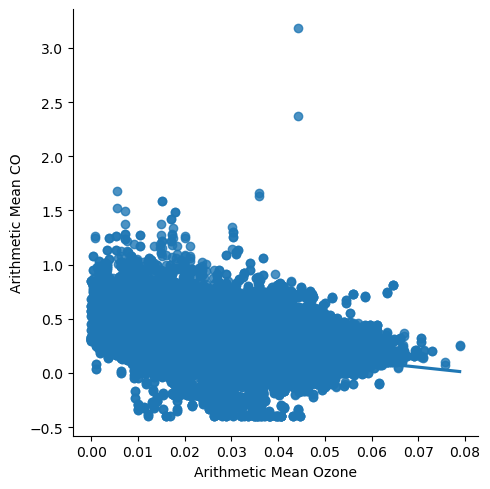

In [16]:
# Create a scatterplot for the "Arithmetic Mean Ozone" and "Arithmetic Mean CO" columns in seaborn

sns.lmplot(x = 'Arithmetic Mean Ozone', y = 'Arithmetic Mean CO', data = df)

In [17]:
# Create a scatterplot for the "Arithmetic Mean Ozone" and "Arithmetic Mean NO2" columns in seaborn

sns.lmplot(x = 'Arithmetic Mean Ozone', y = 'Arithmetic Mean NO2', data = df)

In [18]:
# Create a scatterplot for the "Arithmetic Mean Ozone" and "AQI Ozone" columns in seaborn

sns.lmplot(x = 'Arithmetic Mean Ozone', y = 'AQI Ozone', data = df)

##### Discussion

These scatterplots show that there is little to no correlation between the arithemetic means for Ozone and Sulphur Dioxide. We can also see that there is a negative correlation between the arithmetic means for Ozone and Carbon Monoxide and Nitrogren Dioxide, with Ozone and Nitrogen Dioxide having the strongest relationship. It is clear that as Ozone levels increase, the levels of the other criteria gases decrease, and as Ozone levels increase, the AQI value for Ozone also increases.

#### Pair Plots

In [19]:
# Keep only the variables needed for the pair plot

sub_2 = sub[['Arithmetic Mean Ozone',
          'AQI Ozone',
          'Arithmetic Mean CO',
          'AQI CO',
          'Arithmetic Mean NO2',
          'AQI NO2',
          'Arithmetic Mean SO2',
          'AQI SO2']]

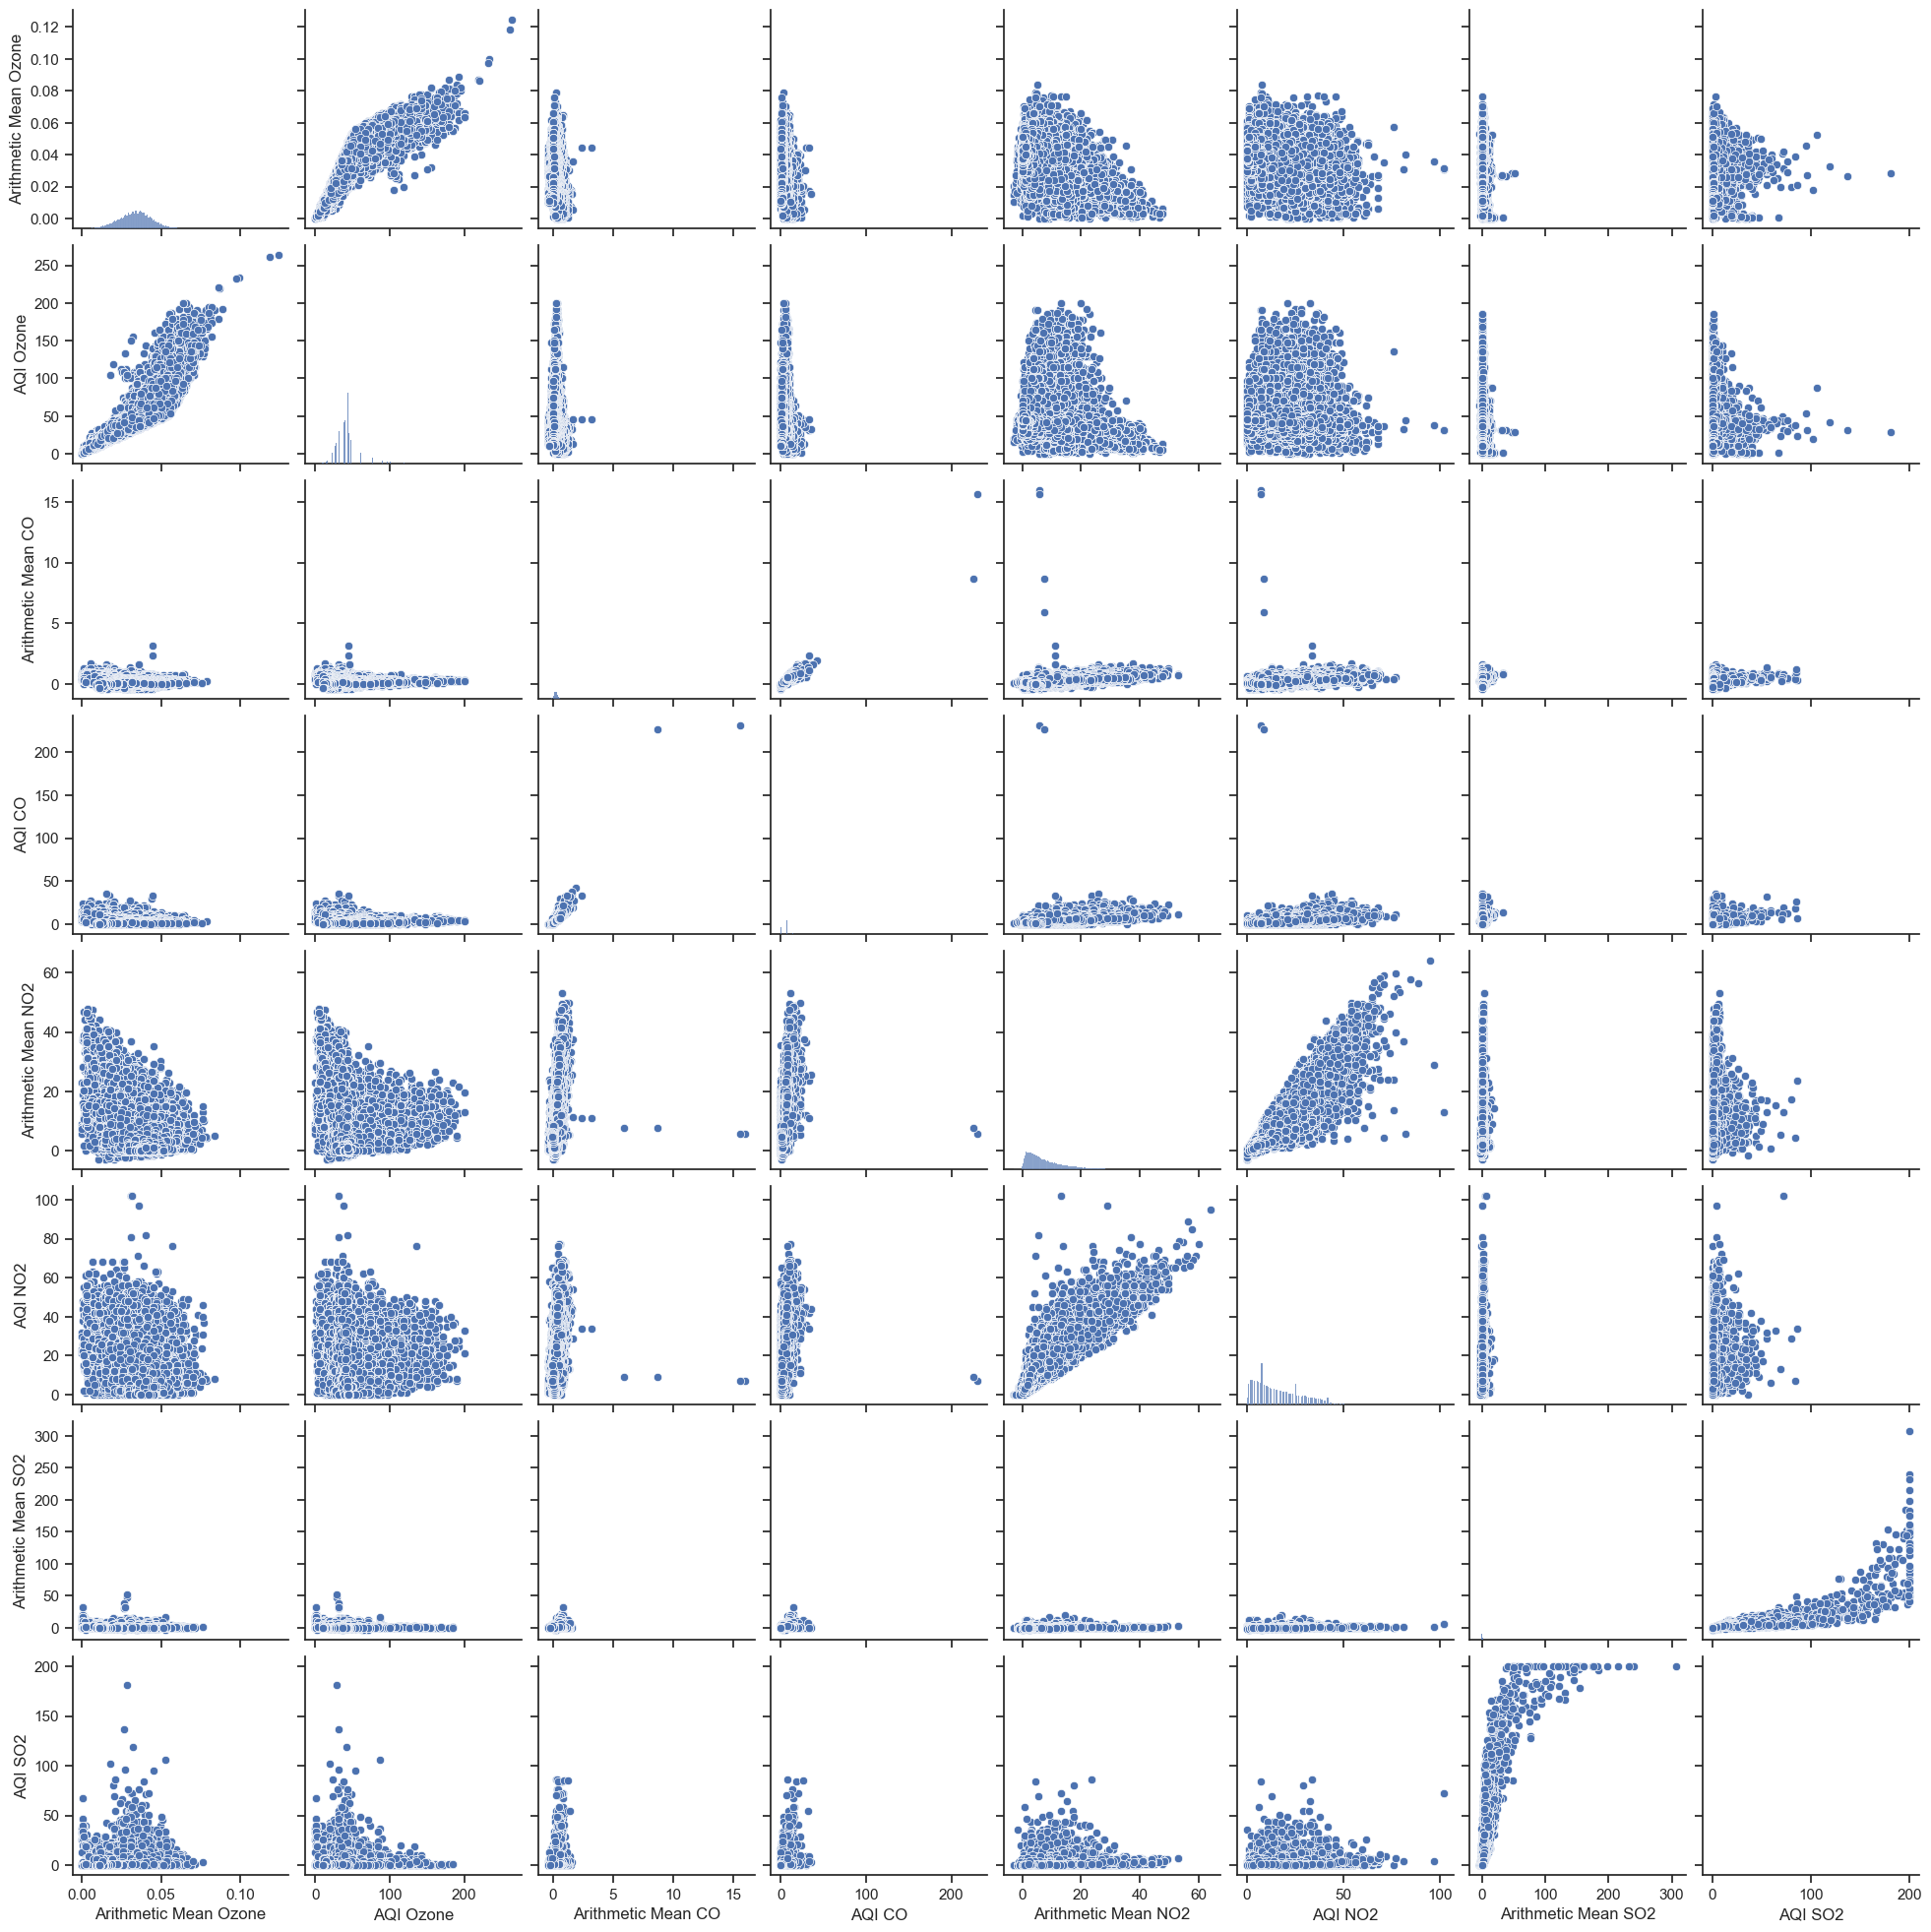

In [47]:
# Create a pair plot 

g = sns.pairplot(sub_2)

##### Discussion

This pair plot shows that there is not much of a relationship between the levels of the gases themselves. The strongest relationships we see are between the arithmetic mean for each gas and the AQI for the same gas. The strongest relationship between two gases appears to be Ozone and Nitrogen Dioxide, so I would like to explor that more in further analysis.

In [48]:
# save figure

g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'))

#### Categorical Plots

##### Creating a cetegorical variable that splits the "AQI Ozone" column into categories

In [23]:
# Use a histogram to visualize the ditribution of the variable

sns.histplot(df['AQI Ozone'], bins = 50, kde = True)

<Axes: xlabel='AQI Ozone', ylabel='Count'>

In [35]:
df.loc[df['AQI Ozone'] < 51, 'AQI Level Ozone'] = 'Good'

In [36]:
df.loc[(df['AQI Ozone'] >= 51) & (df['AQI Ozone'] < 101), 'AQI Level Ozone'] = 'Moderate'

In [37]:
df.loc[(df['AQI Ozone'] >= 101) & (df['AQI Ozone'] < 151), 'AQI Level Ozone'] = 'Unhealthy for Sensitive Groups'

In [38]:
df.loc[(df['AQI Ozone'] >= 151) & (df['AQI Ozone'] < 201), 'AQI Level Ozone'] = 'Unhealthy'

In [39]:
df.loc[(df['AQI Ozone'] >= 201) & (df['AQI Ozone'] < 301), 'AQI Level Ozone'] = 'Very Unhealthy'

In [40]:
df.loc[df['AQI Ozone'] >= 301, 'AQI Level Ozone'] = 'Hazardous'

In [41]:
df['AQI Level Ozone'].value_counts(dropna=False)

Good                              300254
NaN                               130909
Moderate                           37926
Unhealthy for Sensitive Groups      2955
Unhealthy                            360
Very Unhealthy                         6
Name: AQI Level Ozone, dtype: int64

In [49]:
# Create a categorical plot in seaborn using the AQI Ozone categories created above

sns.set(style="ticks")
cat = sns.catplot(x="Arithmetic Mean Ozone", y="Arithmetic Mean NO2", hue="AQI Level Ozone", data=df)

##### Discussion

This chart clearly shows that the highest arithmetic mean for ozone gas corresponds to the most unhealthy AQI levels. We can also see that the most unhealthy Ozone AQI levels occur when NO2 levels are lower.

In [50]:
# save figure

cat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'catplot.png'))

### 03. Research questions

#### Do all criteria gasses behave the same?
    If one gas has a high AQI value, do the others follow?
    Do different gasses follow different seasonal patterns throughout the year?
    Are different gasses more prevalent in different locations?
Through this initial analysis, it is clear that all gasses do not behave in the same way. The two gases with the strongest relationship are Ozone and Nitrogen Dioxide. As Ozone levels increase, Nitrogen Dioxide levels decrease. The one similarity all gasses have is that as the gas level increases, so does it's corresponding AQI level.
Based on the findings here, I am eager to continue exploring how different locations impact these gases, especially if different gasses are more prevalent in different locations.

### 04. Hypothesis

As the NO2 Arithmetic Mean decreases, Ozone AQI levels increase.

### 05. Exporting data

In [51]:
# export dataset with added categories

df.to_pickle(os.path.join(path,'02 Data','Prepared Data','EPA Daily Data with AQI Categories.pkl'))